In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gender_train=pd.read_csv('gender_age_train.csv')
gender_test=pd.read_csv('gender_age_test.csv')

print(gender_train.head())
print(gender_train.shape)


             device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31
(74645, 4)


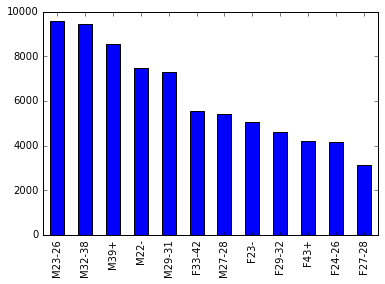

In [3]:
counts=gender_train['group'].value_counts()
counts.plot(kind='bar')
plt.show()

In [4]:
phone_brand = pd.read_csv('phone_brand_device_model.csv',encoding='utf-8')
print(phone_brand.head())
print(phone_brand.shape)

             device_id phone_brand   device_model
0 -8890648629457979026          小米             红米
1  1277779817574759137          小米           MI 2
2  5137427614288105724          三星      Galaxy S4
3  3669464369358936369       SUGAR           时尚手机
4 -5019277647504317457          三星  Galaxy Note 2
(187245, 3)


In [5]:
#Finding instances where the device id in the training set is available in the brand/model set
pb=phone_brand.loc[phone_brand['device_id'].isin(gender_train['device_id'])] 
print(pb.head())
print(pb.shape)

             device_id phone_brand   device_model
0 -8890648629457979026          小米             红米
1  1277779817574759137          小米           MI 2
4 -5019277647504317457          三星  Galaxy Note 2
5  3238009352149731868          华为           Mate
8 -5827952925479472594          小米    MI One Plus
(74839, 3)


Mismatch on sizes so there are probably some duplicate entries

In [6]:
pb.drop_duplicates(subset='device_id',inplace=True)

brandgender=pd.merge(gender_train, pb, on='device_id')
print(brandgender.head(10))

             device_id gender  age   group phone_brand device_model
0 -8076087639492063270      M   35  M32-38          小米         MI 2
1 -2897161552818060146      M   35  M32-38          小米         MI 2
2 -8260683887967679142      M   35  M32-38          小米         MI 2
3 -4938849341048082022      M   30  M29-31          小米       红米note
4   245133531816851882      M   30  M29-31          小米         MI 3
5 -1297074871525174196      F   24  F24-26        OPPO          R1C
6   236877999787307864      M   36  M32-38          酷派           F2
7 -8098239495777311881      M   38  M32-38          小米       红米note
8   176515041953473526      M   33  M32-38        vivo          X3T
9  1596610250680140042      F   36  F33-42          三星    Galaxy S4


/home/aksan/anaconda3/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [40]:
print(brandgender.shape)
#Finding instances of brand popularity by group
Groupbybrand=brandgender.groupby(by=['group','phone_brand']).size()
#print(count)
Groupbybrand.index = [tuple(x) for x in Groupbybrand.index]
Groupbybrand = Groupbybrand.reset_index().set_index(0)
Groupbybrand['Groupbrand']=Groupbybrand['index']
Groupbybrand=Groupbybrand.drop('index',1)
Groupbybrand['count']=Groupbybrand.index
print(Groupbybrand)

Groupbybrand=Groupbybrand[Groupbybrand['count']>500]
print(Groupbybrand)

(74645, 6)
        Groupbrand  count
0                        
2       (F23-, E派)      2
56     (F23-, HTC)     56
8       (F23-, LG)      8
4    (F23-, Lovme)      4
738   (F23-, OPPO)    738
1    (F23-, SUGAR)      1
17     (F23-, TCL)     17
1      (F23-, ZUK)      1
799   (F23-, vivo)    799
6       (F23-, 一加)      6
678     (F23-, 三星)    678
56      (F23-, 中兴)     56
11    (F23-, 中国移动)     11
28      (F23-, 乐视)     28
6       (F23-, 亿通)      6
12      (F23-, 优米)     12
2       (F23-, 优购)      2
2       (F23-, 先锋)      2
21     (F23-, 努比亚)     21
619     (F23-, 华为)    619
1       (F23-, 华硕)      1
2       (F23-, 唯米)      2
6       (F23-, 天语)      6
2       (F23-, 奇酷)      2
2      (F23-, 富可视)      2
944     (F23-, 小米)    944
2      (F23-, 尼比鲁)      2
1       (F23-, 康佳)      1
1       (F23-, 昂达)      1
1       (F23-, 本为)      1
..             ...    ...
1       (M39+, 百加)      1
3      (M39+, 百立丰)      3
1       (M39+, 神舟)      1
6       (M39+, 米歌)      6
1      (M39+, 糖葫芦)      1
1

Not really obvious by inspection what the relationship between age/gender group and phone brand is (if any) but could be useful in the classification model.

In [46]:
#Consideration of app usage
events=pd.read_csv('events.csv')
print(events.shape)

#Finding instances where the device id in the training set is available in the events set
ev=events.loc[events['device_id'].isin(gender_train['device_id'])] 
print(ev.head())
print(ev.shape)

Complete=ev.merge(brandgender,ev,on='device_id')
print(Complete.head(10))

(3252950, 5)
   event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
2         3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66
5         6  1476664663289716375  2016-05-01 00:27:21       0.00      0.00
(1215595, 5)


TypeError: Could not compare ['left'] with block values